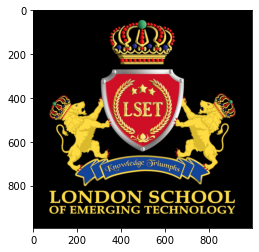

In [13]:
# importing the necessary libraries
 
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
 
# Reading the data as a numpy array
original_image = cv2.cvtColor(cv2.imread('image.jpg'), cv2.COLOR_BGR2RGB)
 
# showing the original image
plt.imshow(original_image)
plt.show()

In [14]:
print(original_image.shape)

(993, 1000, 3)


In [15]:
#Splitting into three channels
b,g,r = cv2.split(original_image)
 
 
# Creating space for the three images to fit
fig = plt.figure(figsize = (15, 7.2))

<Figure size 1080x518.4 with 0 Axes>

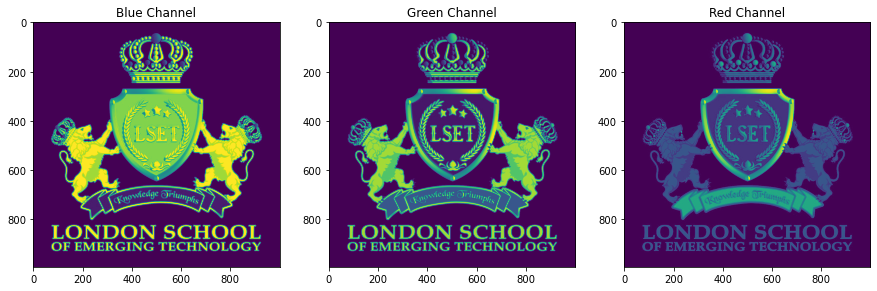

In [22]:
#Splitting into three channels
b,g,r = cv2.split(original_image)
 
 
# Creating space for the three images to fit
fig = plt.figure(figsize = (15, 7.2))
# blue colored image
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(b)
 
# Green colored image
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(g)
 
# Red colored image
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(r)
plt.show()

In [18]:
# printing the shape  of each layer
print(b.shape)
print(r.shape)
print(g.shape)

(993, 1000)
(993, 1000)
(993, 1000)


In [23]:
# scalling the matrix values in between 0, 1
 
df_blue = b/255
df_green = g/255
df_red = r/255
 
# PCA with 50 components for blue matrix
pca_b = PCA(n_components=50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
 
# PCA with 50 components for green one
pca_g = PCA(n_components=50)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
 
# PCA with 50 component for the red one
pca_r = PCA(n_components=50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)
 
# printing the shapes of the matrix
trans_pca_b.shape
trans_pca_r.shape
trans_pca_g.shape

(993, 50)

In [24]:
# printing the varinace percentage
print(f"Blue Matrix : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Matrix: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Matrix  : {sum(pca_r.explained_variance_ratio_)}")

Blue Matrix : 0.9513571714554748
Green Matrix: 0.9350062913981467
Red Matrix  : 0.9297167696956777


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


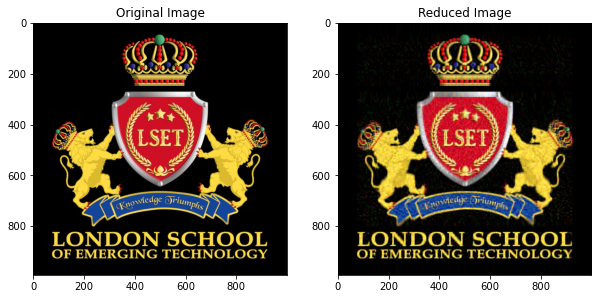

In [25]:
# Reversing the transfrom
blue_arr = pca_b.inverse_transform(trans_pca_b)
green_arr = pca_g.inverse_transform(trans_pca_g)
red_arr = pca_r.inverse_transform(trans_pca_r)
 
# merging the reduced separated matrices
img_reduced= (cv2.merge((blue_arr, green_arr, red_arr)))
fig = plt.figure(figsize = (10, 7.2)) 
 
# Origional image
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(original_image)
 
# Reduced image
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

In [26]:
import pandas as pd
from sklearn.datasets import load_digits

In [27]:
dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [28]:
dataset.data.shape


(1797, 64)

In [29]:
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [30]:
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

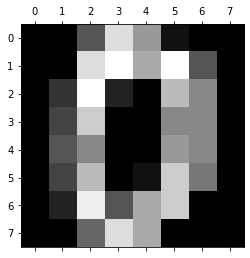

In [31]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(dataset.data[0].reshape(8,8))

In [32]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
X = df
y = dataset.target

from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=30)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9722222222222222

In [34]:
from sklearn.decomposition import PCA
 
pca = PCA(0.95)
 
x_pca = pca.fit_transform(X)
x_pca.shape

(1797, 29)

In [35]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [36]:
pca.n_components_

29

In [37]:
X_train_pca, X_test_pca, y_train,y_test = train_test_split(x_pca,y,test_size=0.2,random_state=30)
X_train_pca
 
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca,y_test)

0.9694444444444444

In [38]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)
X_train_pca, X_test_pca, y_train,y_test = train_test_split(x_pca,y,test_size=0.2,random_state=30) 
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca,y_test)

0.6083333333333333